In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_regression 
import seaborn as sns

In [3]:
x, y, coff=make_regression(n_samples=500, n_features=1, bias=4.2, noise=7.1, coef=True)
print x.shape, y.shape, coff

(500, 1) (500,) 11.332736260165788


In [4]:
make_regression?

In [2]:
x, y=make_regression(n_samples=500, n_features=1, noise=2.8)
print(x.shape, y.shape)
print(x.min(), x.max(), y.max(), y.min())
#is it necessary to have a normal distribution for linear regression if yes then why?

((500, 1), (500,))
(-3.281063443355806, 2.9024572805351534, 256.1247696951846, -287.13401005149007)


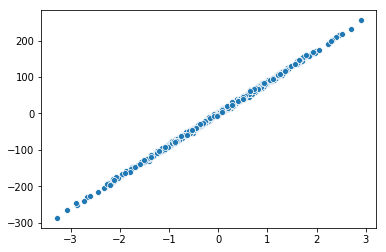

In [4]:
sns.scatterplot(x[:, 0], y[:])

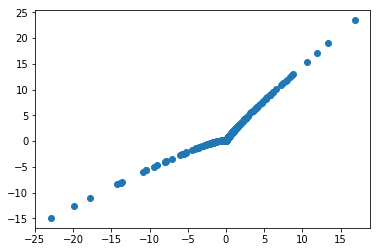

In [4]:
Y=x**3 + x**2
plt.scatter(x**3, Y)

In [5]:
def f(x):
    return 5*x**5 + 4*x**2 -3.0 + 50*(2*np.random.random()-1)


In [6]:
k1= np.asarray([f(x) for x in range(-100, 100)])
k2=np.asarray([f(x) for x in range(-100, 100)])


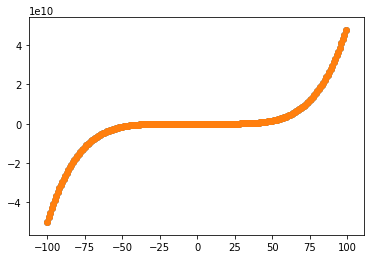

In [7]:
plt.scatter(range(-100, 100), k1)
plt.scatter(range(-100, 100), k2)

In [10]:
x, y, coff=make_regression(n_samples=500, n_features=1, bias=10.2, noise=7.1, coef=True)
print x.shape, y.shape, coff

(500, 1) (500,) 85.06733408544692


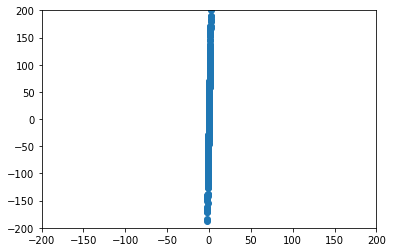

In [11]:
plt.xlim(-200, 200)
plt.ylim(-200, 200)
plt.scatter(x[:, 0], y)

LINEAR REGRESSION

The ideal learning rate in one-dimension is 1/(f(x)^n)
 (the inverse of the second derivative of f(x) at x).

The ideal learning rate for 2 or more dimensions is the inverse of the Hessian (matrix of second partial derivatives).

The story for general convex functions is more complex.

In [12]:
split=int(0.8*x.shape[0])
xtrain=x[:split]
xtest=x[split:]

ytrain=y[:split]
ytest=y[split:]

print(xtrain.shape,xtest.shape, ytrain.shape, ytest.shape)

((400, 1), (100, 1), (400,), (100,))


In [13]:
#hypothesis function
def hypothesis(x, w):
    return x*w[1]+w[0]


#get_error
def get_error(y_true, x, w):
    error=0.0
    m=x.shape[0]
    for ix in range(m):
        error+=(y_true[ix]-hypothesis(x[ix], w))**2
    return error


def error_grad(y_true, x, w):
    grad1=0.0
    grad2=0.0
    m=x.shape[0]
    for ix in range(m):
        grad1+=(y_true[ix]-hypothesis(x[ix], w))*(-1)
        grad2+=(y_true[ix]-hypothesis(x[ix], w))*(-1*x[ix])
    grad1=grad1/m 
    grad2=grad2/m
    return grad1, grad2


def grad_desc(y_true, x, w, learningrate=0.1):
    error=get_error(y_true, x, w)
    grad1, grad2=error_grad(y_true, x, w)
    
    w[0]=w[0]-learningrate*grad1
    w[1]=w[1]-learningrate*grad2
    
    return error, w

    
    

In [14]:
w=np.asarray([0.1, 0.1])
loss=[]

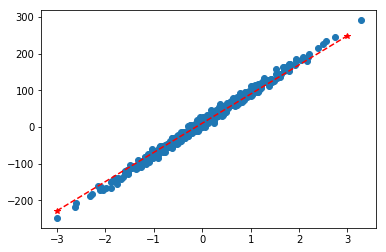

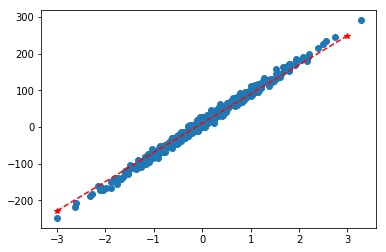

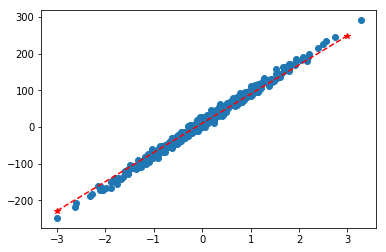

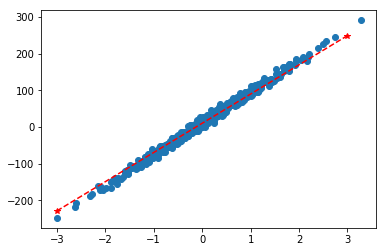

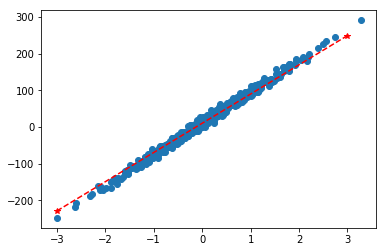

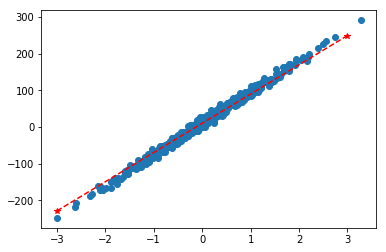

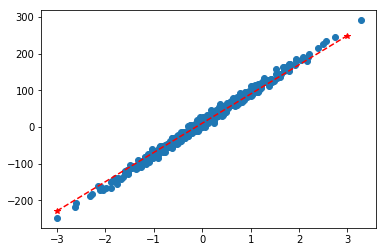

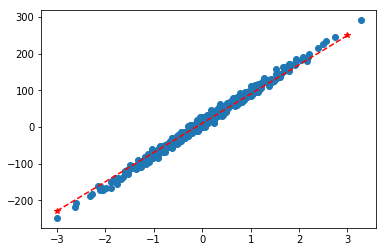

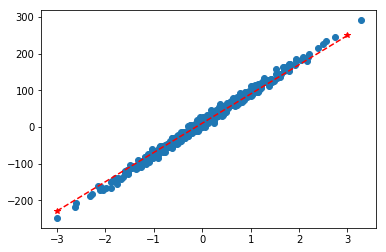

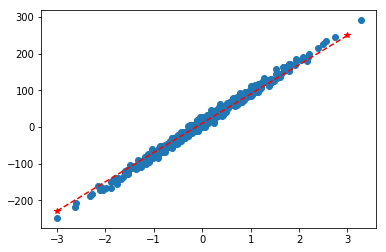

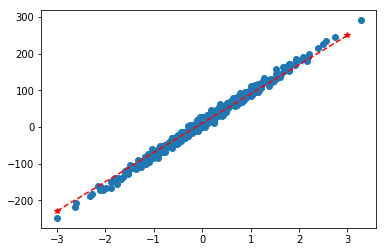

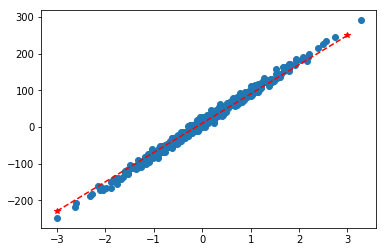

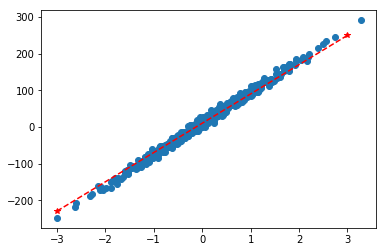

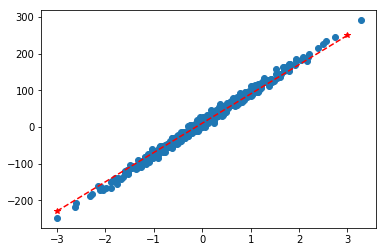

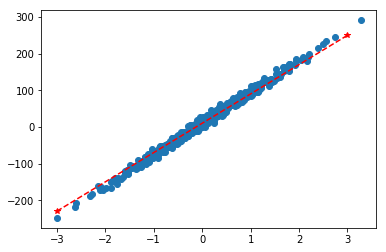

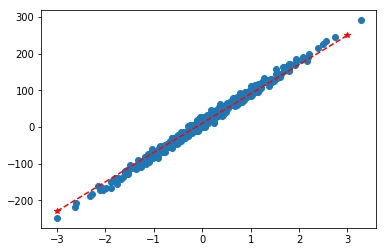

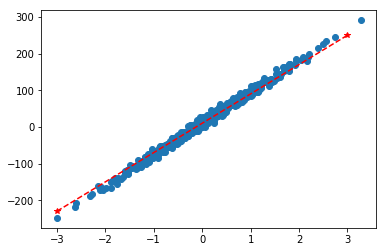

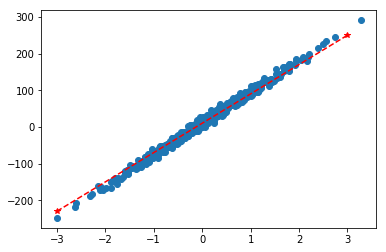

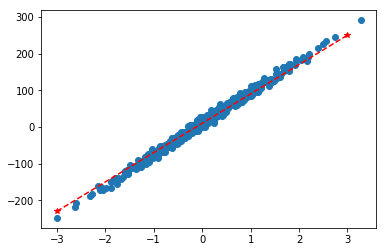

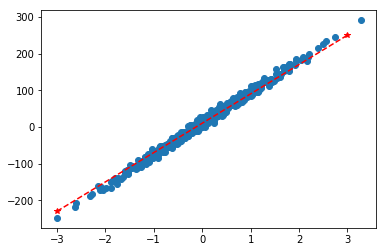

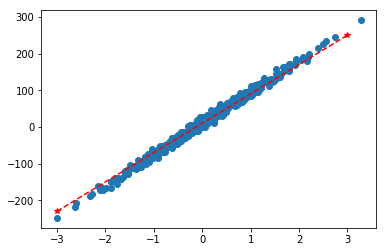

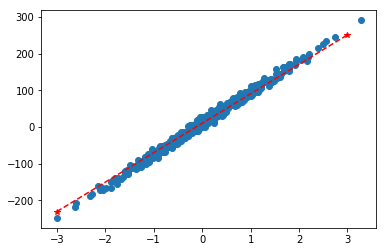

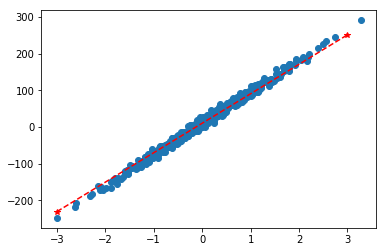

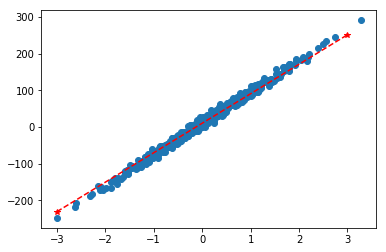

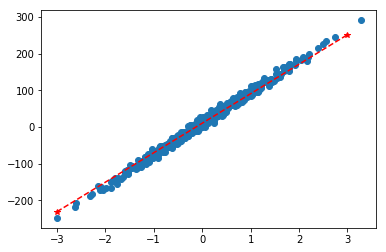

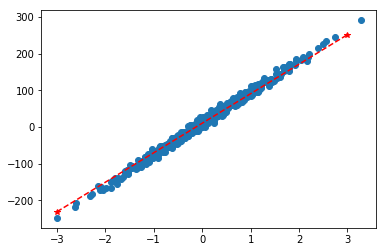

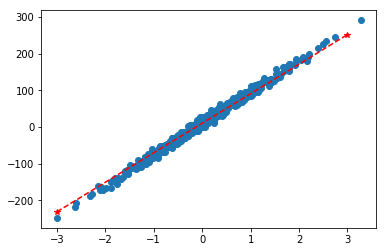

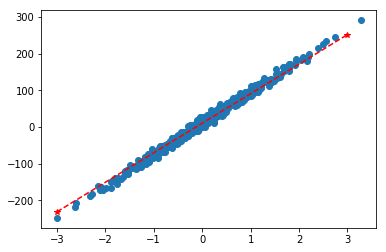

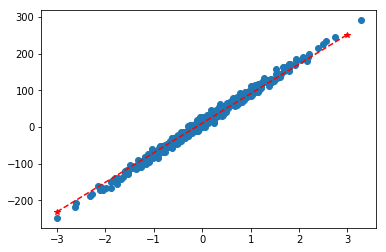

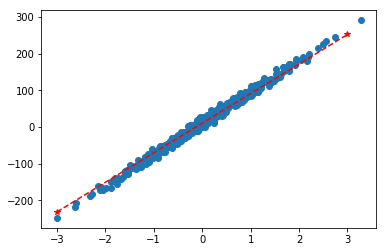

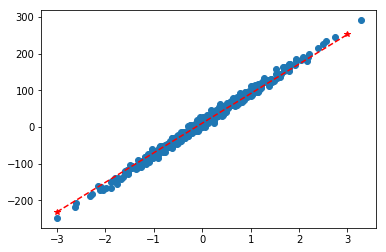

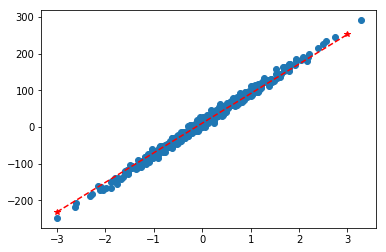

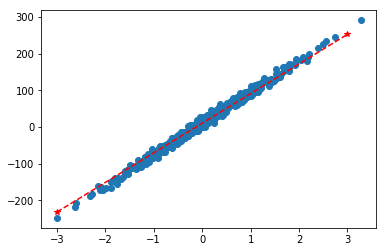

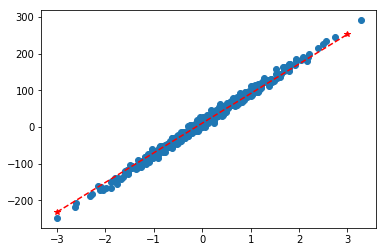

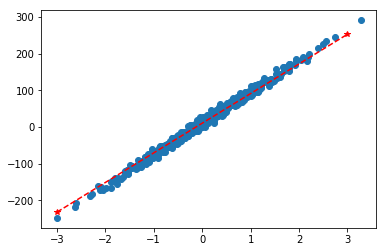

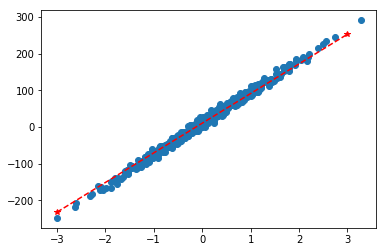

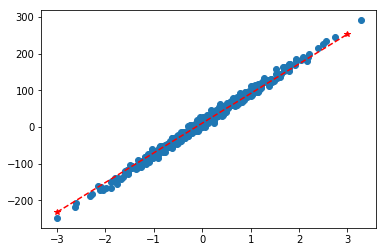

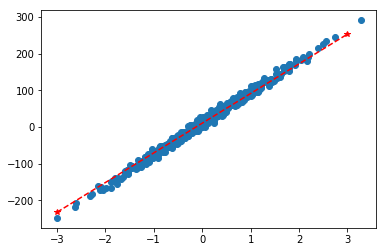

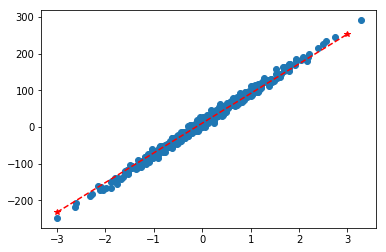

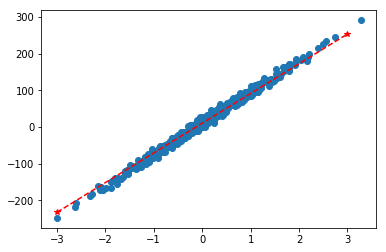

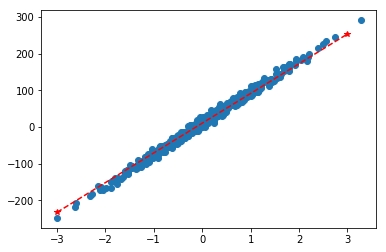

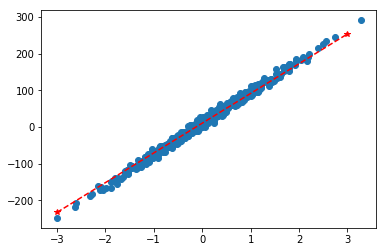

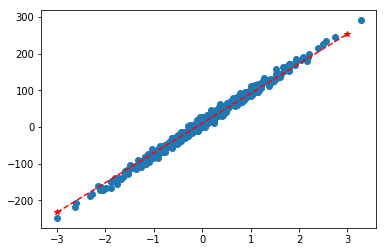

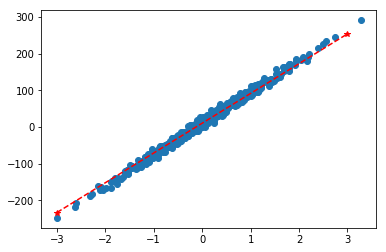

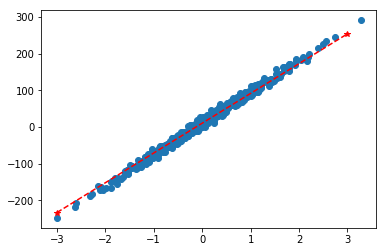

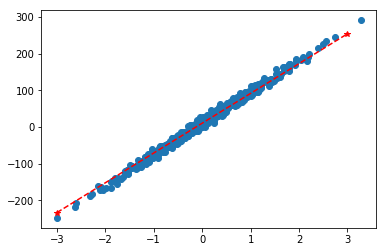

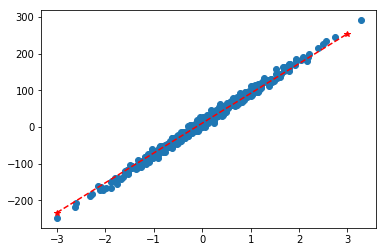

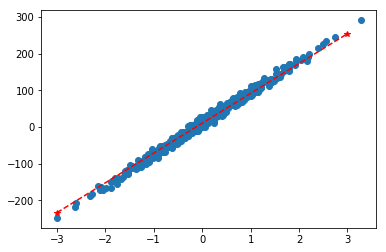

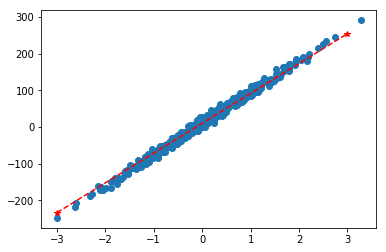

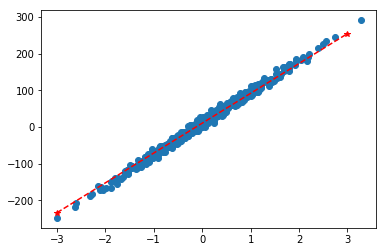

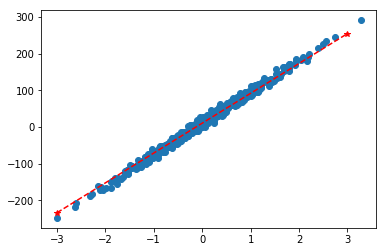

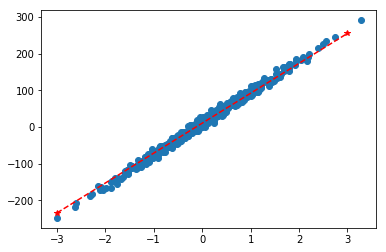

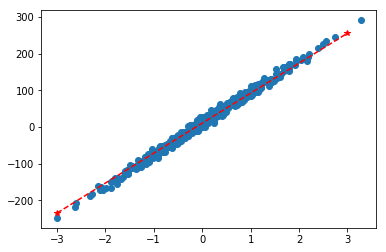

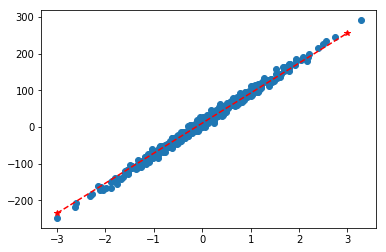

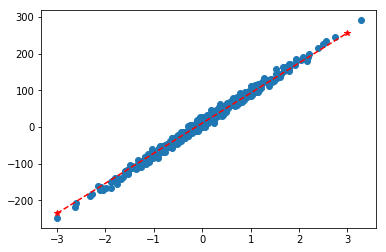

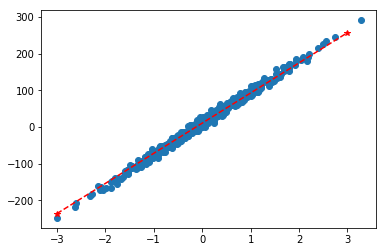

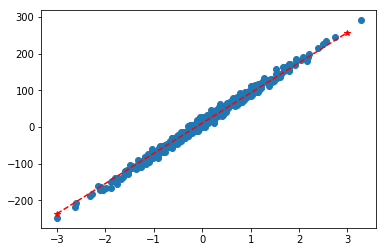

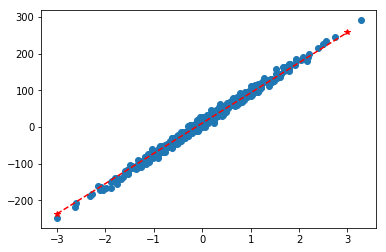

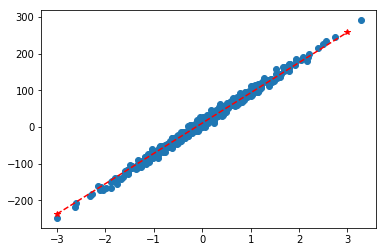

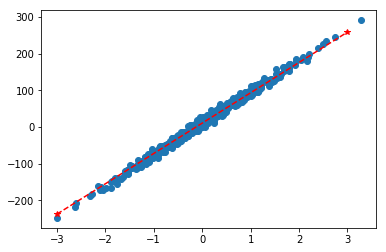

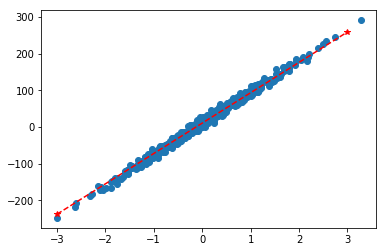

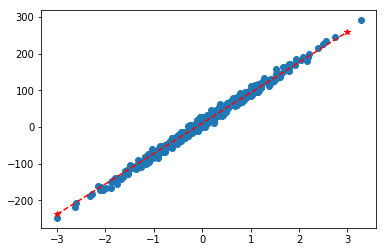

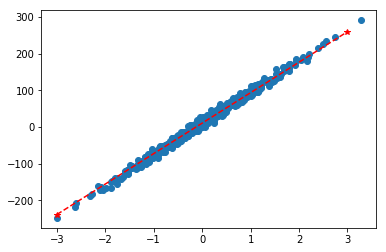

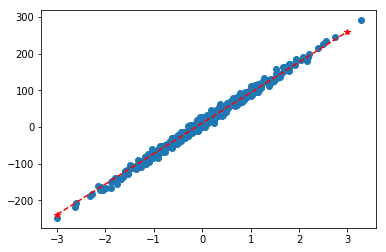

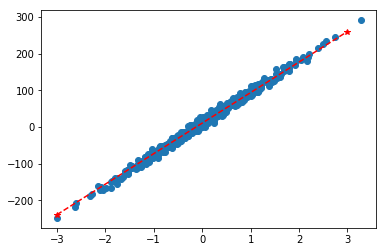

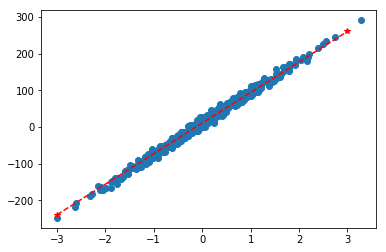

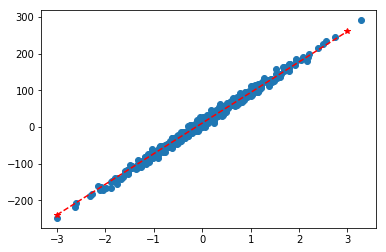

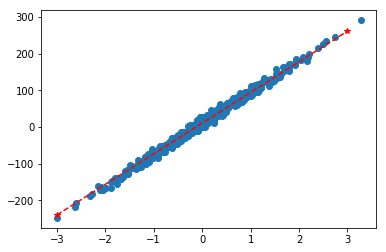

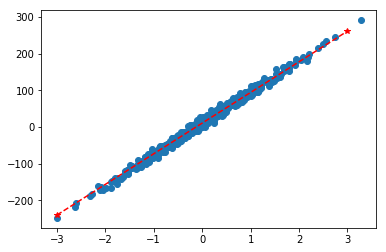

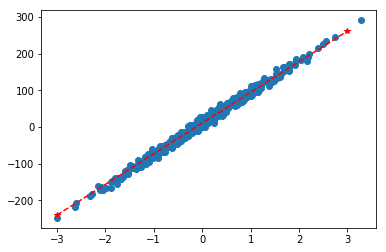

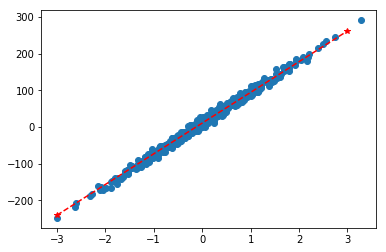

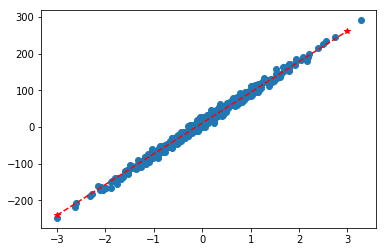

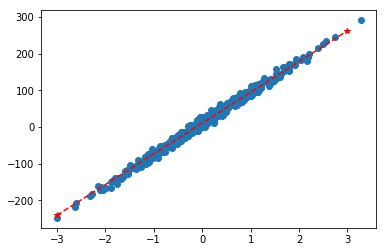

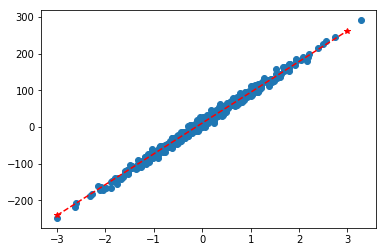

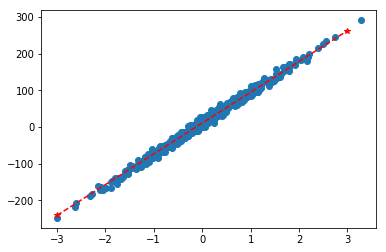

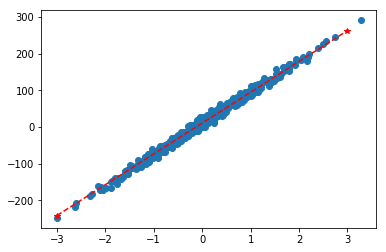

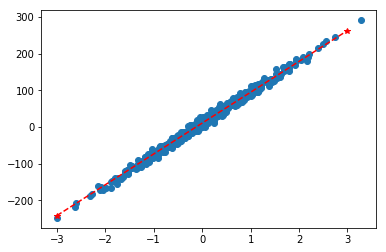

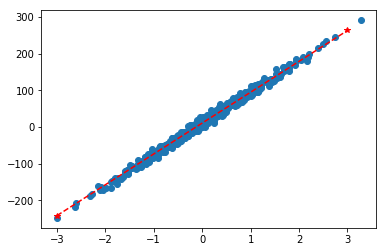

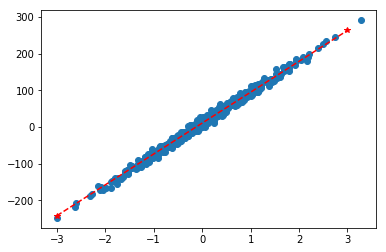

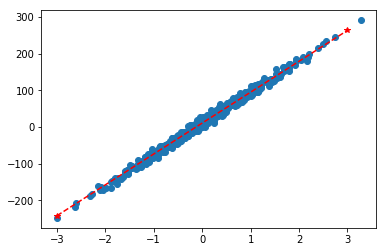

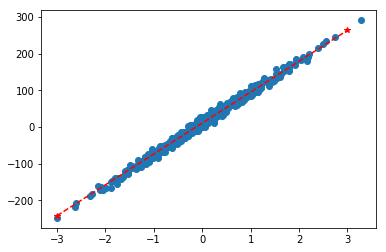

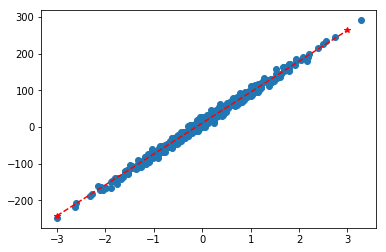

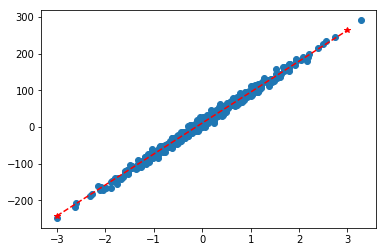

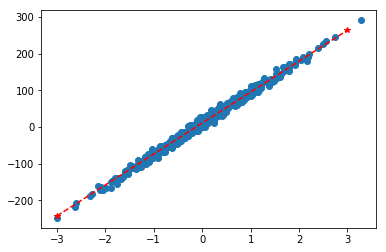

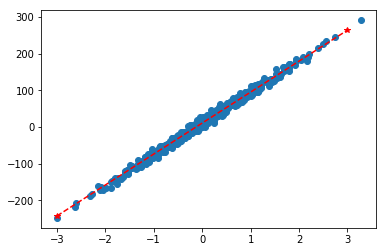

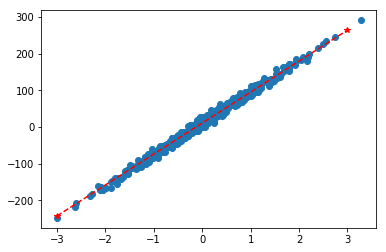

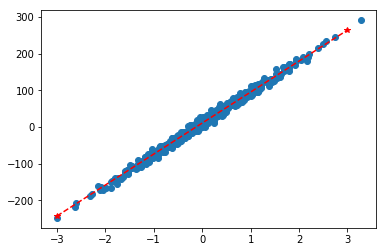

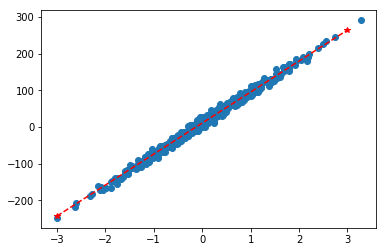

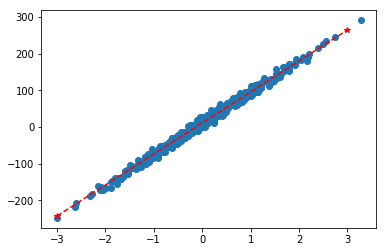

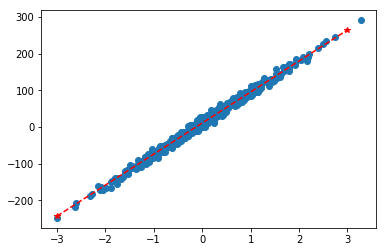

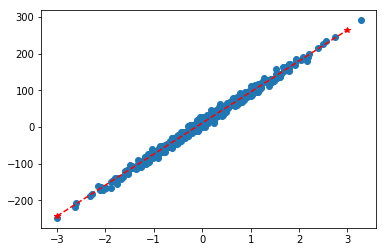

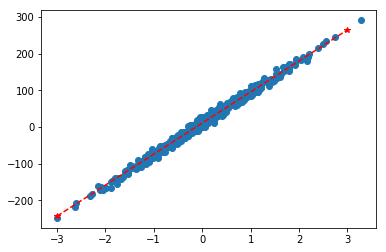

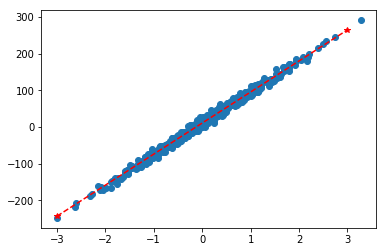

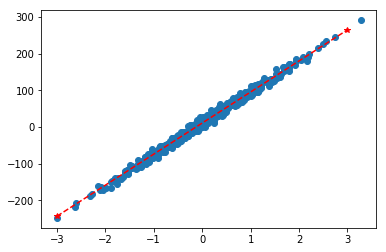

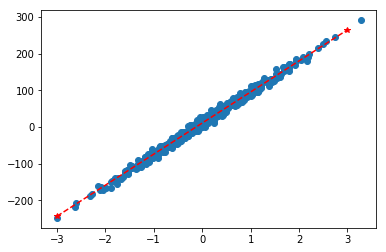

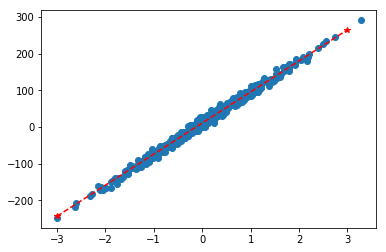

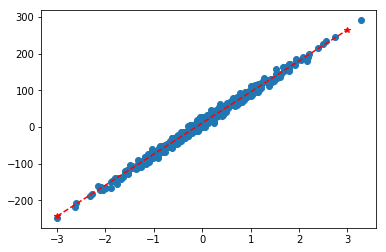

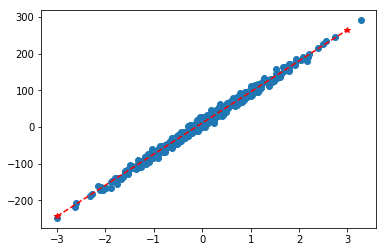

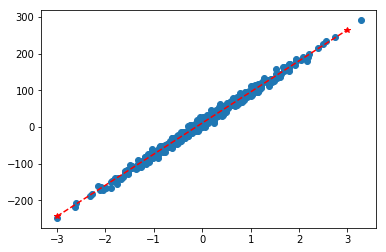

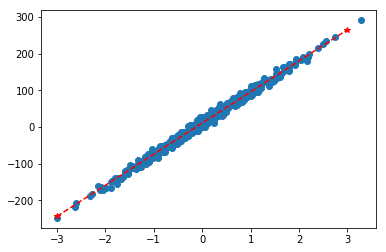

In [17]:
for ix in range(100):
    plt.scatter(x[:, 0], y)
    y0=hypothesis(-3, w)
    y1=hypothesis(3, w)

    plt.plot([-3, 3], [y0, y1], 'r*--')
    plt.show()
    if ix<20:
        l, w=grad_desc(ytrain, xtrain, w, learningrate=0.005)
        loss.append(l)
    elif ix>20 and ix<50:
        l, w=grad_desc(ytrain, xtrain, w, learningrate=0.01)
        loss.append(l)
    else:
        l, w=grad_desc(ytrain, xtrain, w, learningrate=0.05)
        loss.append(l)

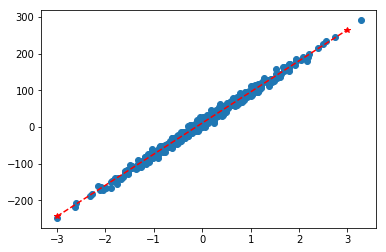

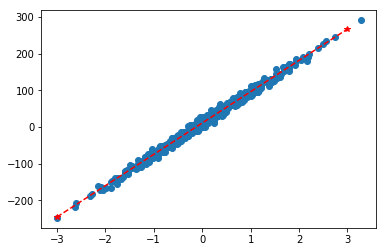

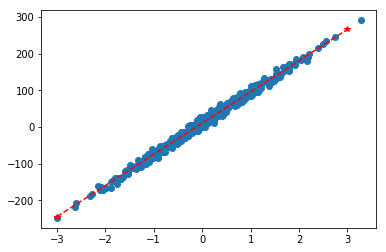

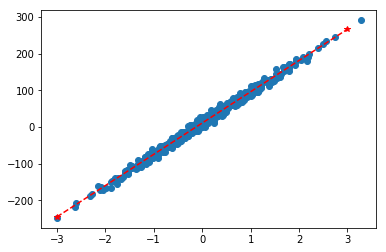

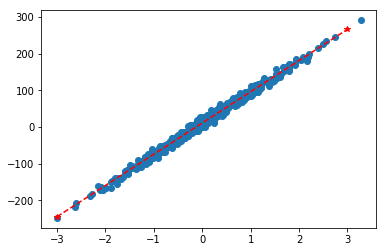

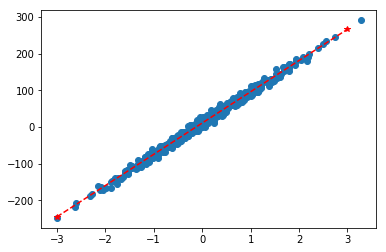

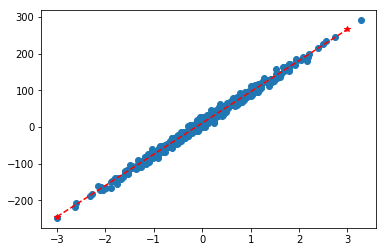

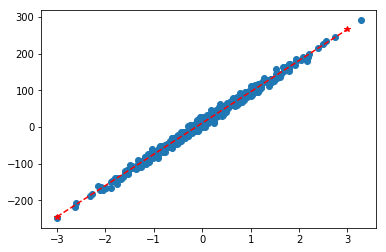

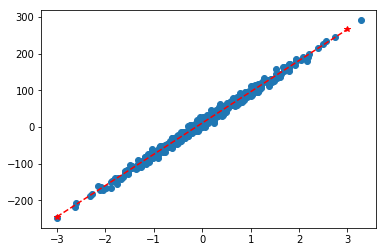

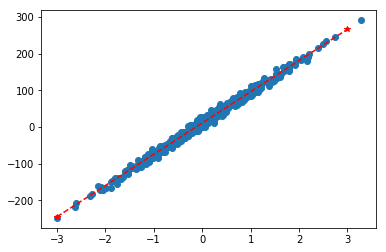

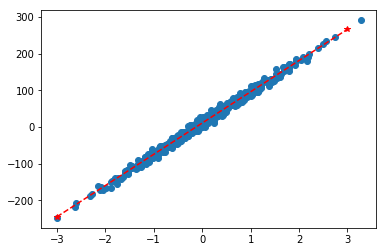

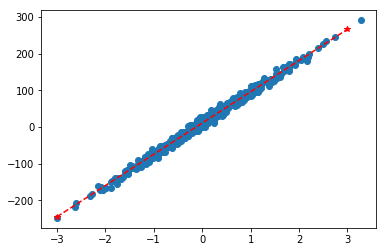

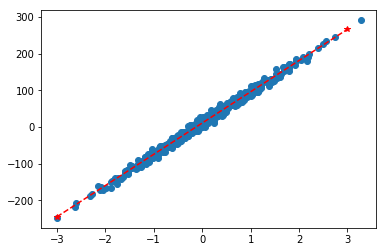

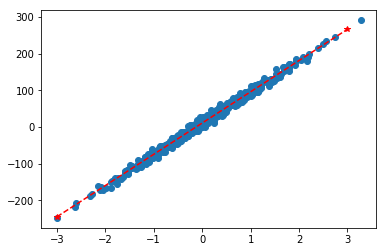

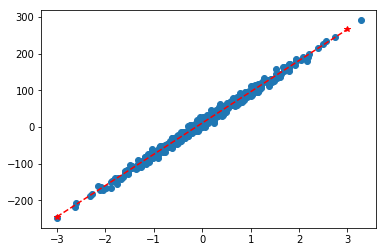

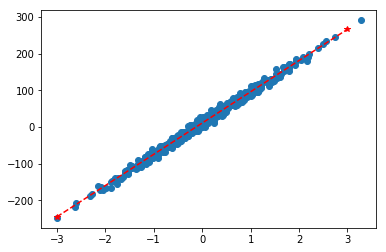

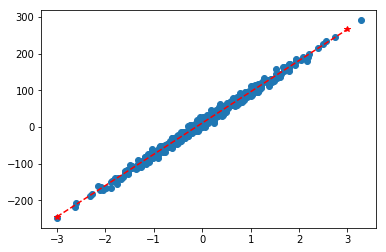

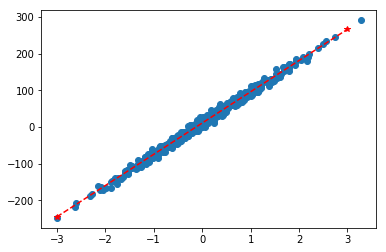

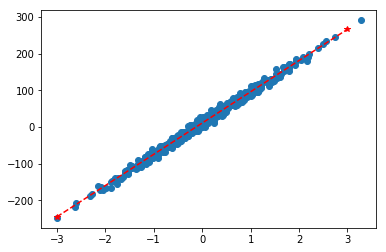

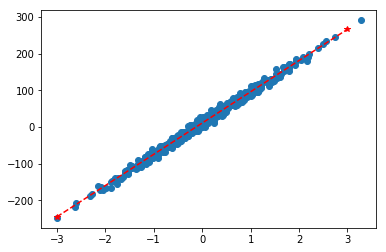

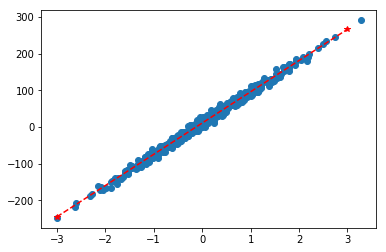

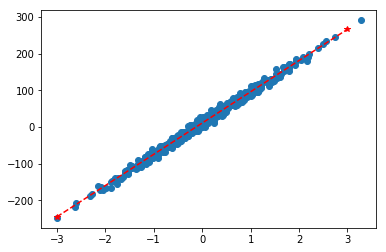

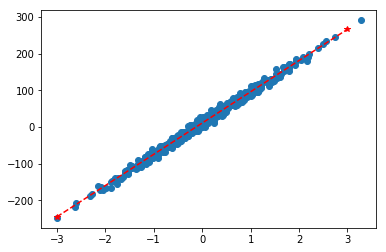

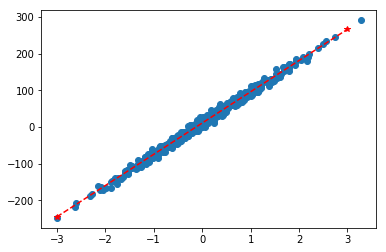

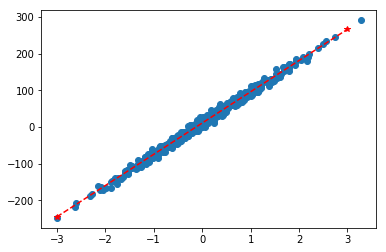

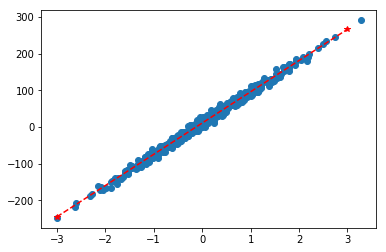

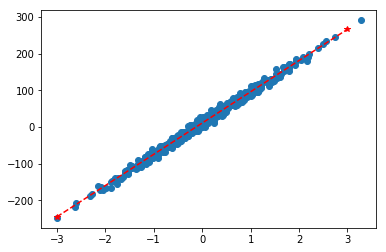

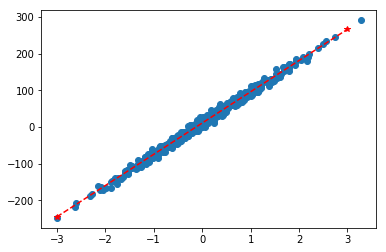

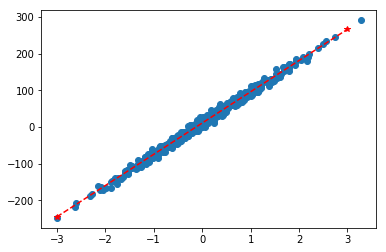

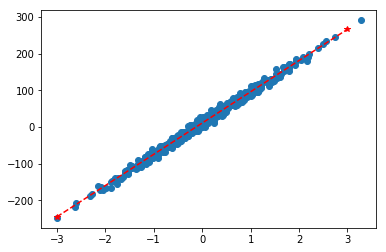

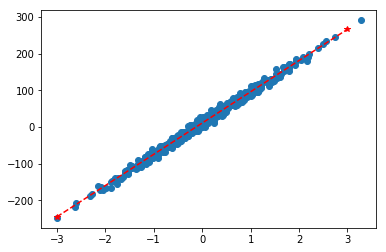

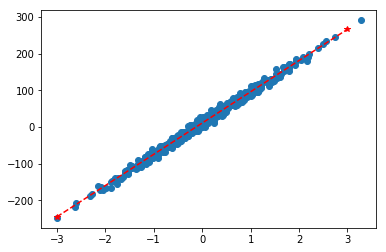

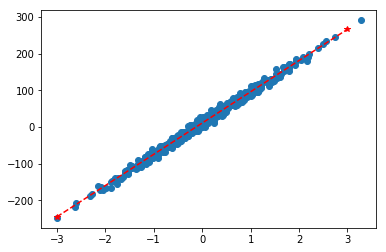

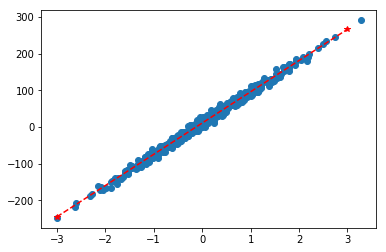

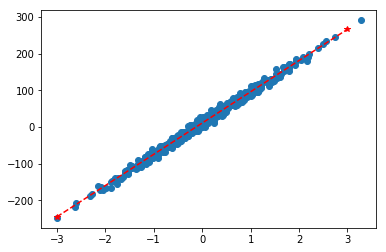

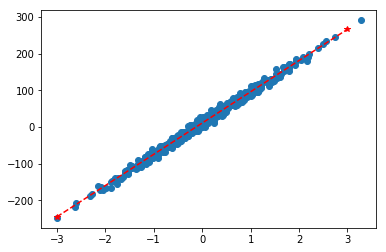

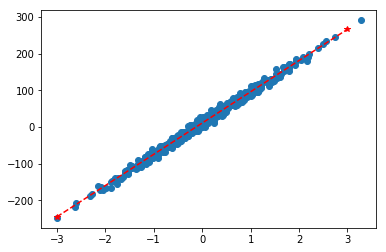

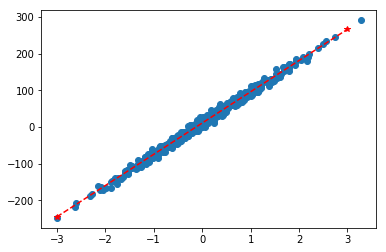

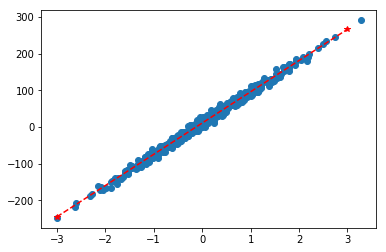

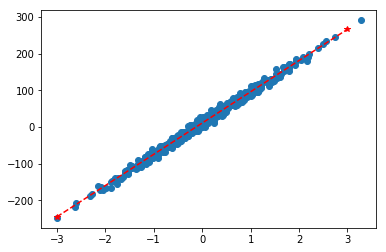

In [18]:
for ix in range(40):
    plt.scatter(x[:, 0], y)
    y0=hypothesis(-3, w)
    y1=hypothesis(3, w)

    plt.plot([-3, 3], [y0, y1], 'r*--')
    plt.show()
    l, w=grad_desc(ytrain, xtrain, w, learningrate=1.7)
    loss.append(l)
    

In [17]:
#print(loss)

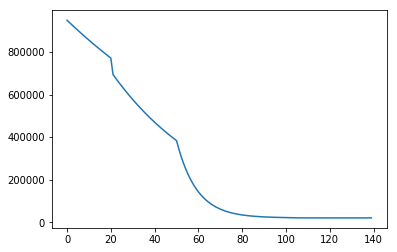

In [18]:
plt.plot(loss)
plt.show()

In [182]:
plt.plot?

In [11]:
make_regression?

In [19]:
print(w)

[10.87673289 85.17604912]


In [17]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain, ytrain)
lr.coef_
lr.intercept_

3.786197414887257

In [18]:
lr.score(xtest, ytest)

0.6815477905458831

In [204]:
LinearRegression?